<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/development/Data_Wrangling_EDA_Troy_S_Meink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our group intends to predict the outcome of a previous World Cup bracket (previous, so we can compare our predictions to the actual results). There are four data sets we're considering using. After completing this initial assignment we will narrow that down to one data set to conduct that analysis with.

This particular data set has several predictions of bracket outcomes for 2022. Some of the other data sets have match outcomes over multiple decades, or data over a wider set of teams.

Below, I download the csv and take a preliminary look at the data.

In [8]:
! git clone https://github.com/vrhughes/DS3001Group

fatal: destination path 'DS3001Group' already exists and is not an empty directory.


In [9]:
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
# Pulling the forecasts csv from the GitHub repo and generating a df:
path = './DS3001Group/Data/wc_forecasts.csv' # Pulling the airbnb data
df = pd.read_csv(path, low_memory=False) # Creating an airbnb dataframe

# Taking a look at the dataframe:
df.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-18 17:56:03 UTC,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2022-12-18 17:56:44 UTC
1,2022-12-18 17:56:03 UTC,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2022-12-18 17:56:44 UTC
2,2022-12-18 17:56:03 UTC,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
3,2022-12-18 17:56:03 UTC,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
4,2022-12-18 17:56:03 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC


The data are extremely clean with no null or missing values and obvious column descriptions.

Some important variables I'll look at is the simulated number of wins/losses, goals scored for/against, and a team's predicted final position.

We could use forecasts similar to these in order to make our own predicitions of a World Cup outcome.

In [17]:
# Looking at a description of the simulated number of wins for a team
#  (sim_wins) conditional on their goals scored (goals_scored):
df.loc[:,['goals_scored', 'sim_wins']].groupby('goals_scored').describe()

sim_wins                                                         \
                count     mean       std      min      25%      50%      75%   
goals_scored                                                                   
0.60432           1.0  0.11259       NaN  0.11259  0.11259  0.11259  0.11259   
1.00000          25.0  0.40000  0.500000  0.00000  0.00000  0.00000  1.00000   
1.24726           1.0  0.28323       NaN  0.28323  0.28323  0.28323  0.28323   
1.29898           1.0  0.20353       NaN  0.20353  0.20353  0.20353  0.20353   
1.31152           1.0  0.46291       NaN  0.46291  0.46291  0.46291  0.46291   
...               ...      ...       ...      ...      ...      ...      ...   
7.78972           1.0  2.64890       NaN  2.64890  2.64890  2.64890  2.64890   
9.00000          10.0  1.50000  0.527046  1.00000  1.00000  1.50000  2.00000   
9.44639           1.0  2.13353       NaN  2.13353  2.13353  2.13353  2.13353   
9.76438           1.0  1.61371       NaN  1.61371  1.61371  1.61371  1.61371   
10.60562          1.0  2.08913       NaN  2.08913  2.08913  2.08913  2.08913   

                       
                  max  
goals_scored           
0.60432       0.11259  
1.00000       1.00000  
1.24726       0.28323  
1.29898       0.20353  
1.31152       0.46291  
...               ...  
7.78972       2.64890  
9.00000       2.00000  
9.44639       2.13353  
9.76438       1.61371  
10.60562      2.08913  

[103 rows x 8 columns]

Unsurprisingly, the simulated number of wins for a team tends to go up with higher predictions for the number of goals they'll score per match. For me, this was a good may to make sure I understood the data and what they represent.

Next, I'll make a scatterplot with these two variables to see if they could be used to predict how far a team will progress in the bracket.

<Axes: xlabel='sim_wins', ylabel='goals_scored'>

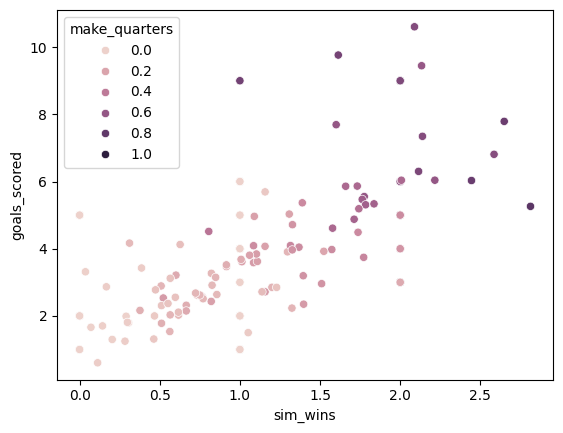

In [18]:
# Creating a scatterplot of simulated wins vs. number
#  of goals scored with hue based on whether or not
#  they're predicted to make quarter finals:
sns.scatterplot(data=df, x='sim_wins', y='goals_scored', hue='make_quarters')